In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


# Any results you write to the current directory are saved as output.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import os


%matplotlib inline


df1 = pd.read_csv('labs.csv')
df2 = pd.read_csv('examination.csv')
df3 = pd.read_csv('demographic.csv')
df4 = pd.read_csv('diet.csv')
df5 = pd.read_csv('questionnaire.csv')

In [61]:
df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

#Creates one big matrix of patient data

df = df.rename(columns = {'SEQN' : 'ID',
                          'DIQ010' : 'Diabetes', #1 means yes, 2 means no, 3 means boarderline, part of novel analysis
                          'PAD660' : 'Intense_PAperDay', #Intense physical activity per day in minutes, part of novel analysis
                          'PAD675' : 'Moderate_PAperDay', #Moderate physical activity per day in minutes, part of novel analysis
                          'SMQ040' : 'Current_Smoker', #1 means everyday, 2 means sometimes, 3 means never, part of novel analysis
                          'ALQ130' : 'Drinks_per_Occassion', #part of novel analysis
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', #NaN --> American
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

df = df.loc[:, ['ID', 'Diabetes', 'Intense_PAperDay', 'Moderate_PAperDay', 'Current_Smoker', 'Drinks_per_Occassion','Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]


head_df = df.head()
print(head_df)
df.describe()


      ID  Diabetes  Intense_PAperDay  Moderate_PAperDay  Current_Smoker  \
0  73557       1.0               NaN                NaN             3.0   
1  73558       1.0               NaN                NaN             2.0   
2  73559       1.0               NaN              180.0             3.0   
3  73560       2.0               NaN                NaN             NaN   
4  73561       2.0               NaN                NaN             NaN   

   Drinks_per_Occassion  Gender  Years_in_US  Family_income  GlycoHemoglobin  \
0                   1.0       1          NaN           0.84             13.9   
1                   4.0       1          NaN           1.78              9.1   
2                   NaN       1          NaN           4.51              8.9   
3                   NaN       1          NaN           2.52              NaN   
4                   NaN       2          NaN           5.00              4.9   

   ArmCircum  SaggitalAbdominal  GripStrength  Breast_fed  
0       

,ID,Diabetes,Intense_PAperDay,Moderate_PAperDay,Current_Smoker,Drinks_per_Occassion,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9422.000000,1979.000000,2944.000000,2484.000000,3463.000000,9813.000000,1837.000000,9051.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000
mean,78644.559971,1.947145,87.267307,63.215693,2.138889,3.534796,1.509426,8.933043,2.253101,5.642556,28.485765,21.114034,63.054891,1.984528
std,2938.592266,0.346588,320.281571,59.952960,0.941948,29.410605,0.499937,17.787060,1.635458,1.004850,7.961971,4.963949,25.098439,0.123426
min,73557.000000,1.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,2.000000,40.000000,30.000000,1.000000,1.000000,1.000000,3.000000,0.870000,5.200000,22.600000,17.300000,45.600000,2.000000
50%,78643.000000,2.000000,60.000000,60.000000,3.000000,2.000000,2.000000,5.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,120.000000,60.000000,3.000000,3.000000,2.000000,7.000000,3.610000,5.800000,34.000000,24.400000,80.700000,2.000000
max,83731.000000,9.000000,9999.000000,900.000000,3.000000,999.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


       ID  Diabetes  Intense_PAperDay  Moderate_PAperDay  Current_Smoker  \
0   73557       1.0               0.0                0.0             3.0   
1   73558       1.0               0.0                0.0             2.0   
2   73559       1.0               0.0              180.0             3.0   
5   73562       2.0               0.0                0.0             3.0   
8   73566       2.0             120.0                0.0             3.0   
9   73567       2.0               0.0                0.0             1.0   
10  73568       2.0               0.0                0.0             1.0   
20  73579       2.0               0.0                0.0             3.0   
38  73597       2.0               0.0                0.0             3.0   
39  73598       2.0               0.0               20.0             3.0   

    Drinks_per_Occassion  Gender  Years_in_US  Family_income  GlycoHemoglobin  \
0                    1.0       1          0.0           0.84             13.9   
1

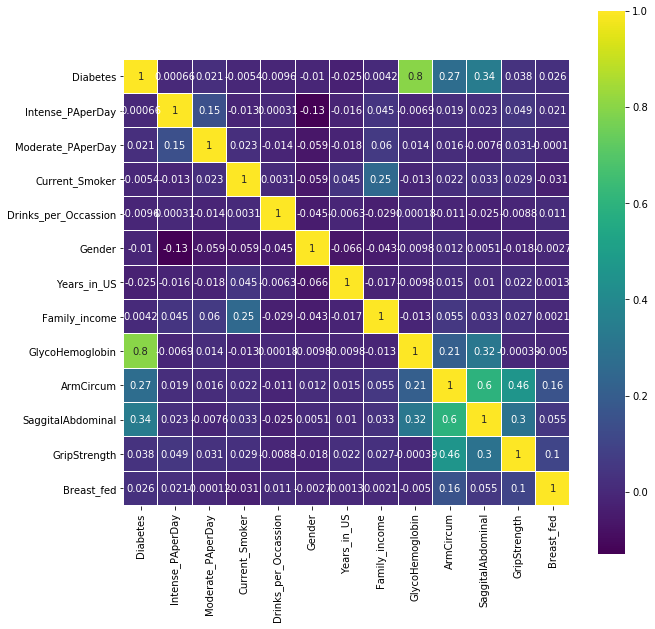

In [62]:
#Notes for cleaning: (Subjects with values inconclusive / not helpful)
#Get rid of all subjects with values that are not 1, 2,or 3 for Diabetes
#Need to turn NaN in data for physical activity to 0.0
#Subjects with values other than 1,2, or 3, for Current_Smoker will be taken out at a later time
#Do BMI calculation with alternative data


df = df.dropna(subset=['Diabetes', 'Current_Smoker'])

#df.dropna(axis=1, how='all')
#df.dropna(axis=0, how='all')

df['Intense_PAperDay'] = df['Intense_PAperDay'].fillna(value = 0)
df['Moderate_PAperDay'] = df['Moderate_PAperDay'].fillna(value = 0)

#year in us -> american : 0, not american : 1

df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

#GlycoHemoglobin, Saggital Abdominal(median)
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

#Family Income -> use ffill to fill na
df['Family_income'] = df['Family_income'].fillna(method='ffill')

#Breast_fed -> fill to 1
df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)



print(df.head(10))
df.describe()

df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2


colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

#based on values of heatmap, it is likely high BMI will show very significant correlation with diabetes
#More cleaning and visualizations to come
